## Problem Statement

**Ralph Calvin Hilfiger (RCH) Industries:**
- Clothing manufacturer and retailer Ralph Calvin Hilfiger (RCH) Industries operates five (5) factories. They distribute their products through five (5) regional distribution centres (DCs), each of which supports a specific market.
- To reduce the number of direct shipments between factories and regional DCs, as well as improve the load factor of shipments, RCH has utilised a crossdocking (XD) facility for some time. Owing to the success of their existing crossdocking facility (XD1), RCH has now decided to open an additional facility (XD2).
- The clothes are transported through the network in small plastic totes via truck. The transportation costs for a tote between the five factories and the two crossdocking facilities are given in the table below.

| Transportation Cost | Crossdock 1 | Crossdock 2 |
|---------------------|-------------|-------------|
| Factory 1           | 30          | 50          |
| Factory 2           | 23          | 66          |
| Factory 3           | 35          | 14          |
| Factory 4           | 70          | 12          |
| Factory 5           | 65          | 70          |

- The transportation costs for a tote between the crossdocking facilities and the regional DCs are given in the table below.

| Transportation Cost | DC1 | DC2 | DC3 | DC4 | DC5 |
|---------------------|-----|-----|-----|-----|-----|
| Crossdock 1         | 12  | 25  | 22  | 40  | 41  |
| Crossdock 2         | 65  | 22  | 23  | 12  | 15  |

- The five factories have the following production capacities per week (number of totes):

    - Factory 1: 200
    - Factory 2: 300
    - Factory 3: 100
    - Factory 4: 150
    - Factory 5: 220

- The five regional DCs face the following demand per week (number of totes):

    - DC 1: 150
    - DC 2: 100
    - DC 3: 110
    - DC 4: 200
    - DC 5: 180

- The crossdocking facilities have much spare capacity.

### Model Formulation
To formulate the transhipment problem as a linear programming model, we define the following:

**Indices:**
- $i$ = Origin index (factory, crossdock)
- $j$ = Destination index (crossdock, DC)

**Decision Variables:**
- $x_{ij}$ = Amount of totes transported from origin $i$ to destination $j$

**Parameters:**
- $S_i$ = Supply capacity of factory $i$
- $D_j$ = Demand requirement of DC $j$
- $c_{ij}$ = Cost of transporting one tote from origin $i$ to destination $j$

**Objective Function:**
$$\min z: \sum_{i} \sum_{j} c_{ij} x_{ij}$$

**Constraints:**
1. Supply constraints:
$\sum_{j} x_{ij} \leq S_i \quad \forall i \in \text{factory}$
2. Demand constraints:
$\sum_{i} x_{ij} \geq D_j \quad \forall j \in \text{DC}$
3. Transhipment (flow conservation) constraints:
$\sum_{i} x_{ij} = \sum_{k} x_{jk} \quad \forall j \in \text{crossdock}$
4. Non-negativity constraints:
$x_{ij} \geq 0 \quad \forall i, j$

**Note:** We are importing previously defined functions to avoid rewriting them and to prevent any potential typing errors that could waste time. For this problem, we created a separate utility directory (`util.transshipment2_utils`). The only change was to the `plot_transshipment_network` function, where we manually set the coordinates for the nodes because the available layout algorithms generated messy plots. While this approach sacrifices some automation, it ensures a clearer visual representation. We welcome any suggestions for improving the positioning of the nodes or alternative ways to enhance automation without compromising the plot's readability.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jonathanduquegonzalez/myenv/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/lz/hqm78w6x12b2gll67jmrwpn00000gn/T/ade37d3e7e934d8280ad42f9bd4be245-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/lz/hqm78w6x12b2gll67jmrwpn00000gn/T/ade37d3e7e934d8280ad42f9bd4be245-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 17 COLUMNS
At line 78 RHS
At line 91 BOUNDS
At line 92 ENDATA
Problem MODEL has 12 rows, 20 columns and 40 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 12 (0) rows, 20 (0) columns and 40 (0) elements
0  Obj 0 Primal inf 740 (5)
12  Obj 30220
Optimal - objective value 30220
Optimal objective 30220 - 12 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.

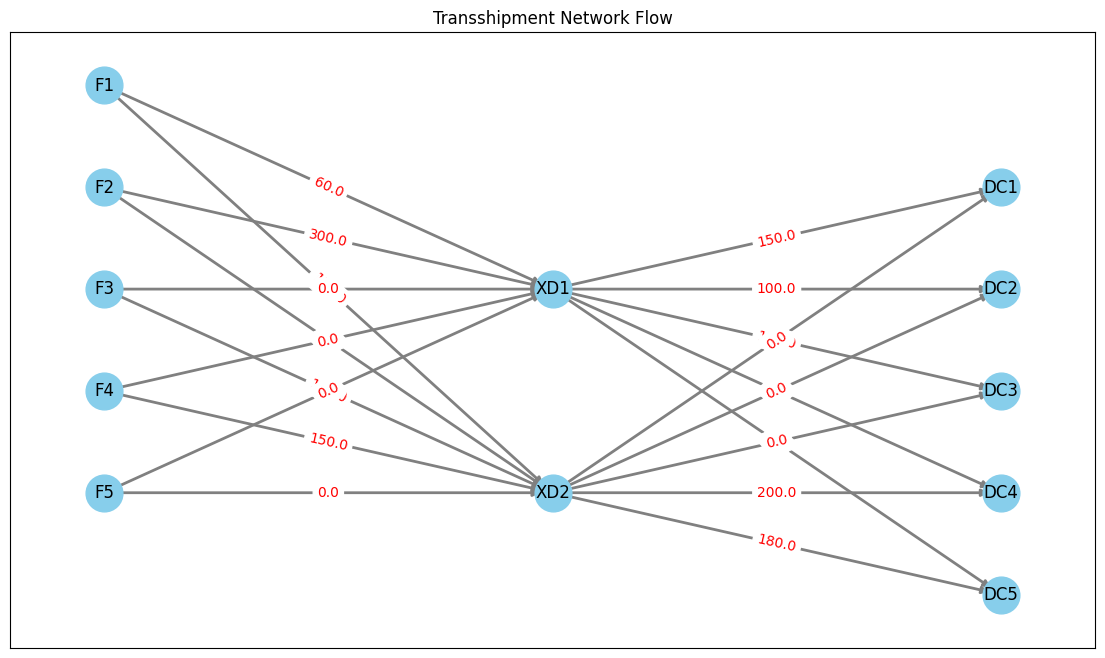

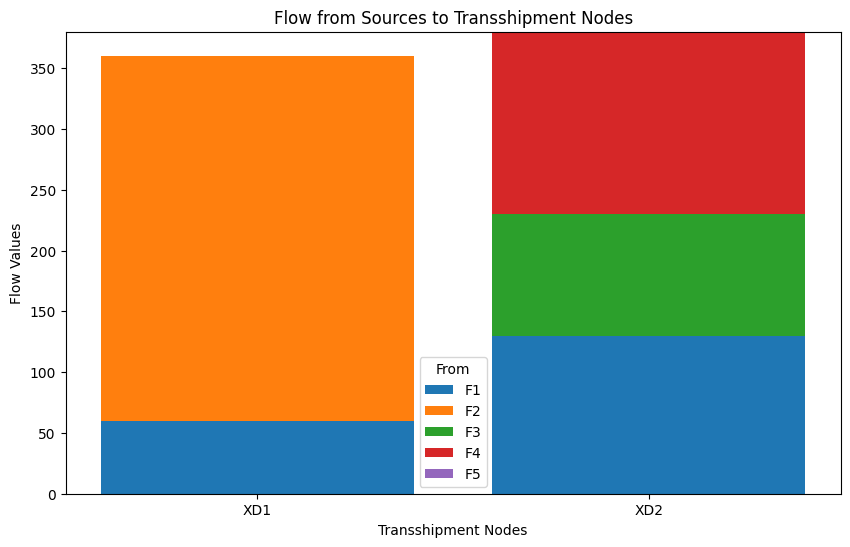

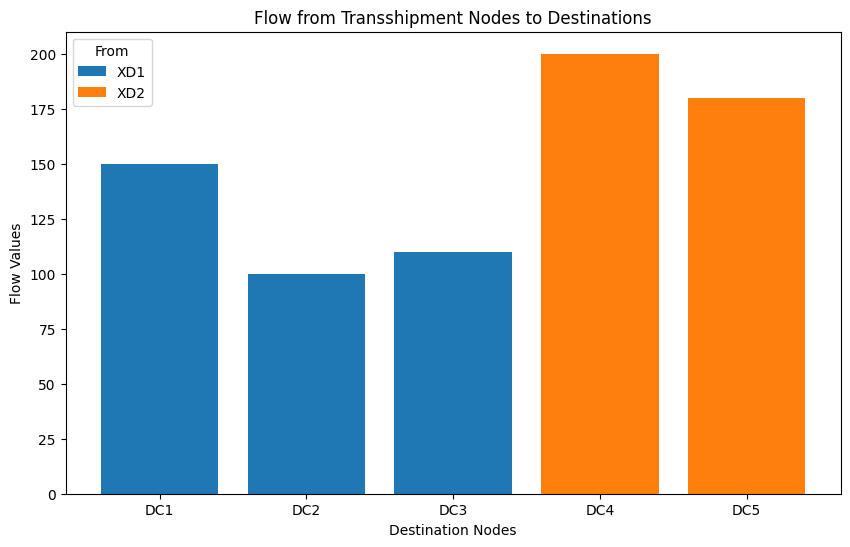


Total Cost:
30220.0


,Variable,Value
0,flow_F1_XD1,60.0
1,flow_F1_XD2,130.0
2,flow_F2_XD1,300.0
3,flow_F2_XD2,0.0
4,flow_F3_XD1,0.0
5,flow_F3_XD2,100.0
6,flow_F4_XD1,0.0
7,flow_F4_XD2,150.0
8,flow_F5_XD1,0.0
9,flow_F5_XD2,0.0


In [1]:
# Import the functions from the util directory
from util.transshipment2_utils import solve_transshipment_problem, plot_transshipment_network, plot_stacked_bar_chart

nodes = {
    'sources': ['F1', 'F2', 'F3', 'F4', 'F5'],
    'transshipments': ['XD1', 'XD2'],
    'destinations': ['DC1', 'DC2', 'DC3', 'DC4', 'DC5']
}

supply = {'F1': 200, 'F2': 300, 'F3': 100, 'F4': 150, 'F5': 220}
demand = {'DC1': 150, 'DC2': 100, 'DC3': 110, 'DC4': 200, 'DC5': 180}
cost = {
    # Factory to Crossdock
    ('F1', 'XD1'): 30, ('F1', 'XD2'): 50,
    ('F2', 'XD1'): 23, ('F2', 'XD2'): 66,
    ('F3', 'XD1'): 35, ('F3', 'XD2'): 14,
    ('F4', 'XD1'): 70, ('F4', 'XD2'): 12,
    ('F5', 'XD1'): 65, ('F5', 'XD2'): 70,
    # Crossdock to DC
    ('XD1', 'DC1'): 12, ('XD1', 'DC2'): 25, ('XD1', 'DC3'): 22, ('XD1', 'DC4'): 40, ('XD1', 'DC5'): 41,
    ('XD2', 'DC1'): 65, ('XD2', 'DC2'): 22, ('XD2', 'DC3'): 23, ('XD2', 'DC4'): 12, ('XD2', 'DC5'): 15
}

# Solve the problem, store results in DataFrame, and plot the network and bar chart
results_df, total_cost = solve_transshipment_problem(nodes, supply, demand, cost, plot_network=True, plot_bar_chart=True)

print("\nTotal Cost:")
print(total_cost)

results_df